In [90]:
#importing libraries that we will use
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline

# Web Scraping
##### here we are going to get the data from aqar website.
***we are looking for houses in Riyadh Capital of Saudi Arabia and we will scrap over 29000 house based on some features. and save it in pickle file***

In [ ]:
url = 'https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/%D8%AC%D9%86%D9%88%D8%A8-%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/%D8%AD%D9%8A-%D8%A7%D9%84%D8%B9%D8%B2%D9%8A%D8%B2%D9%8A%D8%A9/%D8%B4%D8%A7%D8%B1%D8%B9-%D8%A7%D9%84%D8%AF%D9%84%D9%85-%D8%AD%D9%8A-%D8%A7%D9%84%D8%B9%D8%B2%D9%8A%D8%B2%D9%8A%D8%A9-%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6-%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6-3606693'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page, "lxml") 

In [ ]:
links =['/فلل-للبيع/الرياض/1']
houses=[]
for i in range(1500):
    url1 =f'https://sa.aqar.fm{links[i]}'
    response = requests.get(url1)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    for k in range(20):
        houses.append(soup.find_all(class_='titleAndDetails')[k].find('a').get('href'))
          
    links.append(soup.find(id='next-page').get('href'))

In [ ]:
a_file = open("housess.pkl", "wb")
pickle.dump(houses, a_file)
a_file.close()

In [ ]:
a_file = open("housess.pkl", "rb")
houses = pickle.load(a_file)

In [ ]:
for house in houses1:
    url =f'https://sa.aqar.fm{house}'
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    try:
        k={'المساحة':np.nan,'الواجهة':np.nan,'غرف النوم':np.nan,'الصالات':np.nan,'دورات مياه':np.nan,'عرض الشارع':np.nan,'عمر العقار':np.nan,'الشقق':np.nan,'السعر':np.nan,'المنطقة':np.nan,'الحي':np.nan}
        k['المنطقة'] = soup.find('div',class_ = 'tree treeMargin').find_all('li')[2].text
        k['الحي'] = soup.find('div',class_ = 'tree treeMargin').find_all('li')[3].text
        k['السعر'] = soup.find('span',class_ = 'listingPagePrice').find_all('span')[1].text.replace(',','')
        for f in soup.find('table',class_='dc-detailsTable').find_all('tr'):        
            k[f.find_all('td')[1].text] = f.find_all('td')[0].text
        for key, value in k.items():
            m[key].append(value)
    except:
        pass

In [ ]:
a_file = open("datahouseall.pkl", "wb")
pickle.dump(m, a_file)
a_file.close()

In [ ]:
a_file = open("datahouse6.pkl", "rb")
m = pickle.load(a_file)

In [ ]:
m={'المساحة':list(),'الواجهة':list(),'غرف النوم':list(),'الصالات':list(),'دورات مياه':list(),'عرض الشارع':list(),'عمر العقار':list(),'الشقق':list(),'المنطقة':list(),'الحي':list(),'السعر':list()}

In [ ]:
data_T =  = pd.DataFrame.from_dict(m).T

In [ ]:
l.to_pickle("houseall.pkl")

In [91]:
#now we will load the data.
data = pd.read_pickle("houseall.pkl")

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29961 entries, 0 to 29960
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   المساحة     29961 non-null  object
 1   الواجهة     29961 non-null  object
 2   غرف النوم   29961 non-null  object
 3   الصالات     29244 non-null  object
 4   دورات مياه  29961 non-null  object
 5   عرض الشارع  29813 non-null  object
 6   عمر العقار  22741 non-null  object
 7   الشقق       14066 non-null  object
 8   المنطقة     29961 non-null  object
 9   الحي        29961 non-null  object
 10  السعر       29961 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [93]:
data.head(10)

,المساحة,الواجهة,غرف النوم,الصالات,دورات مياه,عرض الشارع,عمر العقار,الشقق,المنطقة,الحي,السعر
0,1120 م²,جنوب شرقي,7,3,5,20 م,NaN,1,شرق الرياض,حي الخليج,7000000
1,250 م²,شرق,5,1,4,20 م,NaN,NaN,جنوب الرياض,حي الدار البيضاء,890000
2,375 م²,غرب,7,1,4,20 م,6 سنة,NaN,غرب الرياض,حي طويق,1000000
3,406 م²,جنوب,5,2,5,15 م,جديد,NaN,شمال الرياض,حي العارض,2400000
4,840 م²,شرق,5,4,5,50 م,27 سنة,3,جنوب الرياض,حي العزيزية,2000000
5,600 م²,جنوب,7,1,5,15 م,جديد,NaN,جنوب الرياض,حي المصفاة,650000
6,445 م²,شمال غربي,7,NaN,5,10 م,NaN,NaN,شرق الرياض,حي النسيم الغربي,1700000
7,270 م²,جنوب,5,2,5,13 م,جديد,NaN,شمال الرياض,حي العارض,1900000
8,400 م²,جنوب غربي,7,2,5,20 م,NaN,1,غرب الرياض,حي المهدية,1900000
9,360 م²,شرق,3,2,4,15 م,2 سنة,NaN,غرب الرياض,حي طويق,1050000


In [94]:
data.sample(15)

,المساحة,الواجهة,غرف النوم,الصالات,دورات مياه,عرض الشارع,عمر العقار,الشقق,المنطقة,الحي,السعر
12420,300 م²,جنوب,3,2,5,25 م,جديد,2,غرب الرياض,حي المهدية,1950000
29159,507 م²,جنوب,5,5,5,20 م,جديد,NaN,شمال الرياض,حي الرحمانية,5500000
28164,420 م²,غرب,5,5,5,20 م,جديد,1,شرق الرياض,حي المونسية,3200000
11602,1120 م²,جنوب شرقي,7,3,5,20 م,NaN,1,شرق الرياض,حي الخليج,7000000
18680,810 م²,غرب,7,2,5,15 م,9 سنة,2,شمال الرياض,حي حطين,7800000
25307,750 م²,غرب,6,2,3,10 م,36 سنة,NaN,شرق الرياض,حي النسيم الغربي,1300000
18857,400 م²,شرق,4,2,5,20 م,جديد,NaN,غرب الرياض,حي طويق,1150000
26658,350 م²,غرب,3,1,5,20 م,جديد,NaN,غرب الرياض,حي ديراب,950000
9921,355 م²,جنوب شرقي,3,2,3,20 م,جديد,3,غرب الرياض,حي عليشة,1900000
20684,210 م²,جنوب,5,2,5,15 م,جديد,NaN,شمال الرياض,حي العارض,2200000


In [95]:
data.tail()

,المساحة,الواجهة,غرف النوم,الصالات,دورات مياه,عرض الشارع,عمر العقار,الشقق,المنطقة,الحي,السعر
29956,215 م²,جنوب,4,2,5,15 م,جديد,NaN,شمال الرياض,حي العارض,1975000
29957,325 م²,شمال,3,2,4,15 م,جديد,2,شرق الرياض,حي القادسية,1500000
29958,300 م²,جنوب شرقي,7,3,5,15 م,جديد,1,شرق الرياض,حي الرمال,1480000
29959,900 م²,شمال شرقي,5,2,5,15 م,17 سنة,NaN,غرب الرياض,حي ظهرة البديعة,1900000
29960,270 م²,شرق,5,2,5,17 م,جديد,NaN,غرب الرياض,حي الحزم,1050000


In [96]:
#rename arabic columns to english names.
dt = data.rename(columns={"المساحة": "area", "الواجهة": "House_Front_Side","غرف النوم": "BedRooms", 
                   "الصالات": "halls","دورات مياه": "BathRooms", "عرض الشارع": "ST_Width",
                  "عمر العقار": "R_E_AGE","الشقق": "Apartments", "المنطقة": "Region",
                  'الحي': "neighborhood","السعر": "Price"})

In [97]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29961 entries, 0 to 29960
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              29961 non-null  object
 1   House_Front_Side  29961 non-null  object
 2   BedRooms          29961 non-null  object
 3   halls             29244 non-null  object
 4   BathRooms         29961 non-null  object
 5   ST_Width          29813 non-null  object
 6   R_E_AGE           22741 non-null  object
 7   Apartments        14066 non-null  object
 8   Region            29961 non-null  object
 9   neighborhood      29961 non-null  object
 10  Price             29961 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [98]:
dt.head(7)

,area,House_Front_Side,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Region,neighborhood,Price
0,1120 م²,جنوب شرقي,7,3,5,20 م,NaN,1,شرق الرياض,حي الخليج,7000000
1,250 م²,شرق,5,1,4,20 م,NaN,NaN,جنوب الرياض,حي الدار البيضاء,890000
2,375 م²,غرب,7,1,4,20 م,6 سنة,NaN,غرب الرياض,حي طويق,1000000
3,406 م²,جنوب,5,2,5,15 م,جديد,NaN,شمال الرياض,حي العارض,2400000
4,840 م²,شرق,5,4,5,50 م,27 سنة,3,جنوب الرياض,حي العزيزية,2000000
5,600 م²,جنوب,7,1,5,15 م,جديد,NaN,جنوب الرياض,حي المصفاة,650000
6,445 م²,شمال غربي,7,NaN,5,10 م,NaN,NaN,شرق الرياض,حي النسيم الغربي,1700000


In [99]:
dt.sample(15)

,area,House_Front_Side,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Region,neighborhood,Price
117,276 م²,جنوب,7,2,4,NaN,4 سنة,1,شرق الرياض,حي الرمال,1200000
15838,525 م²,جنوب,5,2,5,25 م,جديد,NaN,شمال الرياض,حي الملقا,5300000
11031,375 م²,شمال,3,2,5,18 م,جديد,2,شمال الرياض,حي النرجس,2800000
16626,260 م²,جنوب شرقي,5,1,3,20 م,جديد,1,جنوب الرياض,حي الدار البيضاء,1050000
5765,312 م²,شمال,3,1,5,5 م,جديد,NaN,شرق الرياض,حي الرمال,1400000
17556,200 م²,جنوب,5,3,5,20 م,جديد,NaN,غرب الرياض,حي طويق,920000
17712,250 م²,جنوب غربي,5,3,5,20 م,جديد,NaN,شرق الرياض,حي الرمال,1300000
21017,750 م²,شرق,5,4,5,10 م,27 سنة,2,شمال الرياض,حي المصيف,3000000
15533,1250 م²,جنوب شرقي,5,4,5,20 م,20 سنة,NaN,شرق الرياض,حي الملز,4000000
16641,300 م²,جنوب,5,2,5,25 م,جديد,NaN,غرب الرياض,حي طويق,1270000


In [100]:
dt.tail(8)

,area,House_Front_Side,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Region,neighborhood,Price
29953,375 م²,شمال,7,NaN,5,15 م,NaN,2,شمال الرياض,حي النرجس,2650000
29954,550 م²,شرق,7,2,5,20 م,36 سنة,NaN,شرق الرياض,حي الملك فيصل,1800000
29955,360 م²,شمال,4,5,5,19 م,جديد,NaN,شمال الرياض,حي الملقا,4000000
29956,215 م²,جنوب,4,2,5,15 م,جديد,NaN,شمال الرياض,حي العارض,1975000
29957,325 م²,شمال,3,2,4,15 م,جديد,2,شرق الرياض,حي القادسية,1500000
29958,300 م²,جنوب شرقي,7,3,5,15 م,جديد,1,شرق الرياض,حي الرمال,1480000
29959,900 م²,شمال شرقي,5,2,5,15 م,17 سنة,NaN,غرب الرياض,حي ظهرة البديعة,1900000
29960,270 م²,شرق,5,2,5,17 م,جديد,NaN,غرب الرياض,حي الحزم,1050000


## in next cell we will rename values to english and change string or words to numerical to change data types  

In [101]:

dt['area'] = dt['area'].str.replace('م²','')
dt['R_E_AGE'] = dt['R_E_AGE'].str.replace('سنة','')
dt['R_E_AGE'] = dt['R_E_AGE'].str.replace('جديد','1')
dt['ST_Width'] = dt['ST_Width'].str.replace('م','')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('شمال','north')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('غرب','west')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('جنوب','south')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('شرق','east')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('جنوب شرقي','southeast')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('شمال غربي','northwest')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('شمال شرقي','northeast')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('جنوب غربي','southwest')
dt['House_Front_Side'] = dt['House_Front_Side'].str.replace('ي','')
dt['Region'] = dt['Region'].str.replace('وسط الرياض','center')
dt['Region'] = dt['Region'].str.replace('جنوب الرياض','south')
dt['Region'] = dt['Region'].str.replace('شمال الرياض','north')
dt['Region'] = dt['Region'].str.replace('شرق الرياض','east')
dt['Region'] = dt['Region'].str.replace('غرب الرياض','west')

In [102]:
#fill empty value of apartments to 0 
dt['Apartments'] = dt['Apartments'].fillna(0)

In [103]:
#we have human error entry and house front side should be in one side
dt = dt[dt.House_Front_Side != '4 شوارع']
dt = dt[dt.House_Front_Side != '3 شوارع']

In [104]:
#after fill and change what we want nowe drop null falues
dt.dropna(inplace = True)

In [105]:
dt.sample(15)

,area,House_Front_Side,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Region,neighborhood,Price
6309,300,west,5,2,5,18,1,0,west,حي طويق,1190000
24256,350,east,5,2,5,17,1,1,south,حي طيبة,1200000
10441,350,west,7,1,5,15,1,2,east,حي القادسية,1630000
26142,420,west,5,1,4,15,1,0,south,حي الدار البيضاء,980000
3415,272,north,5,2,5,17,1,0,south,حي طيبة,900000
17145,450,east,5,2,5,20,6,2,north,حي النرجس,3200000
4339,750,east,4,2,5,20,1,0,center,حي الربوة,3000000
25506,375,south east,5,2,5,28,1,1,south,حي عكاظ,1350000
9846,200,south,5,1,5,15,1,0,west,حي طويق,950000
16494,200,west,5,3,5,20,1,0,west,حي المهدية,1200000


In [106]:
#here we dont need neighborhood so we want to drop it
dt.drop('neighborhood',axis=1,inplace = True )

In [107]:
#check if there is any duplicated rows
dt.duplicated().sum()


7861

In [108]:
#showing the duplicated row
duplicateRowsDF = dt[dt.duplicated()]
duplicateRowsDF

,area,House_Front_Side,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Region,Price
80,210,south,5,2,5,15,1,0,north,2200000
101,210,south,5,2,5,15,1,0,north,2200000
120,210,south,5,2,5,15,1,0,north,2200000
140,210,south,5,2,5,15,1,0,north,2200000
141,360,south,5,3,5,15,13,4,north,2000000
...,...,...,...,...,...,...,...,...,...,...
29945,385,west,5,2,5,25,1,0,west,1350000
29949,361,east,5,5,5,15,1,1,south,1050000
29950,420,east,4,1,4,20,1,0,west,1200000
29959,900,north east,5,2,5,15,17,0,west,1900000


In [109]:
#drop duplicates
dt = dt.drop_duplicates()

In [110]:
#reset index
dt = dt.reset_index(drop=True)


In [111]:
#check again
dt.duplicated().sum()

0

### in next cell we are going to change data types to numrical

In [112]:
dt['area'] = dt['area'].astype('int64')
dt['BedRooms'] = dt['BedRooms'].astype('int64')
dt['halls'] = dt['halls'].astype('int64')
dt['BathRooms'] = dt['BathRooms'].astype('int64')
dt['ST_Width'] = dt['ST_Width'].astype('int64')
dt['R_E_AGE'] = dt['R_E_AGE'].astype('int64')
dt['Apartments'] = dt['Apartments'].astype('int64')
dt['Price'] = dt['Price'].astype('int64')

In [113]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              14155 non-null  int64 
 1   House_Front_Side  14155 non-null  object
 2   BedRooms          14155 non-null  int64 
 3   halls             14155 non-null  int64 
 4   BathRooms         14155 non-null  int64 
 5   ST_Width          14155 non-null  int64 
 6   R_E_AGE           14155 non-null  int64 
 7   Apartments        14155 non-null  int64 
 8   Region            14155 non-null  object
 9   Price             14155 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.1+ MB


In [114]:
#check correlation between the features and predict
dt.corr()

,area,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Price
area,1.000000,0.124027,0.157522,0.023189,0.087057,0.312785,0.120404,0.618677
BedRooms,0.124027,1.000000,0.210614,0.323825,0.035377,0.122014,0.013323,0.095220
halls,0.157522,0.210614,1.000000,0.239707,0.070303,0.000327,0.072377,0.170331
BathRooms,0.023189,0.323825,0.239707,1.000000,0.066640,-0.106941,-0.063978,0.068735
ST_Width,0.087057,0.035377,0.070303,0.066640,1.000000,-0.090826,-0.011367,0.079918
R_E_AGE,0.312785,0.122014,0.000327,-0.106941,-0.090826,1.000000,0.062413,0.031018
Apartments,0.120404,0.013323,0.072377,-0.063978,-0.011367,0.062413,1.000000,0.014181
Price,0.618677,0.095220,0.170331,0.068735,0.079918,0.031018,0.014181,1.000000


<ipython-input-115-b466ef95334b>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "c" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('FCORR.png', transparent=True, bbox_inches='tight', c = 'w')


''

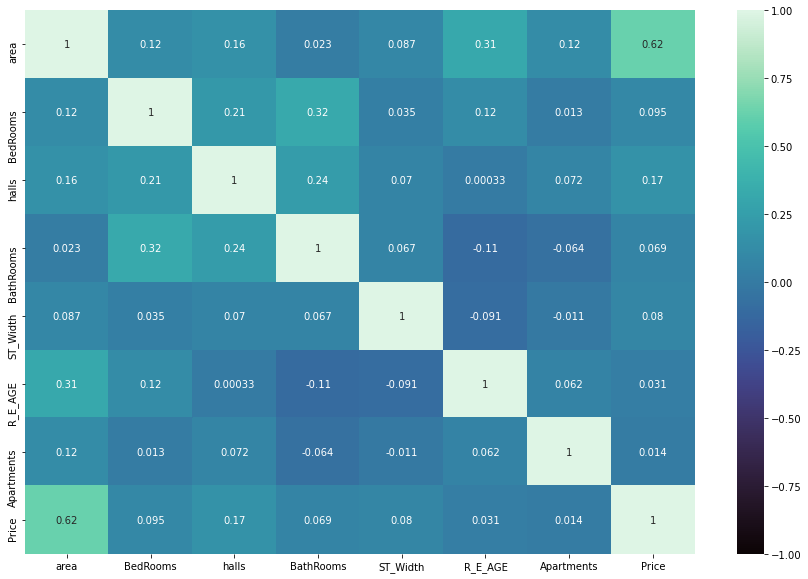

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(dt.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)
plt.savefig('FCORR.png', transparent=True, bbox_inches='tight', c = 'w')
;

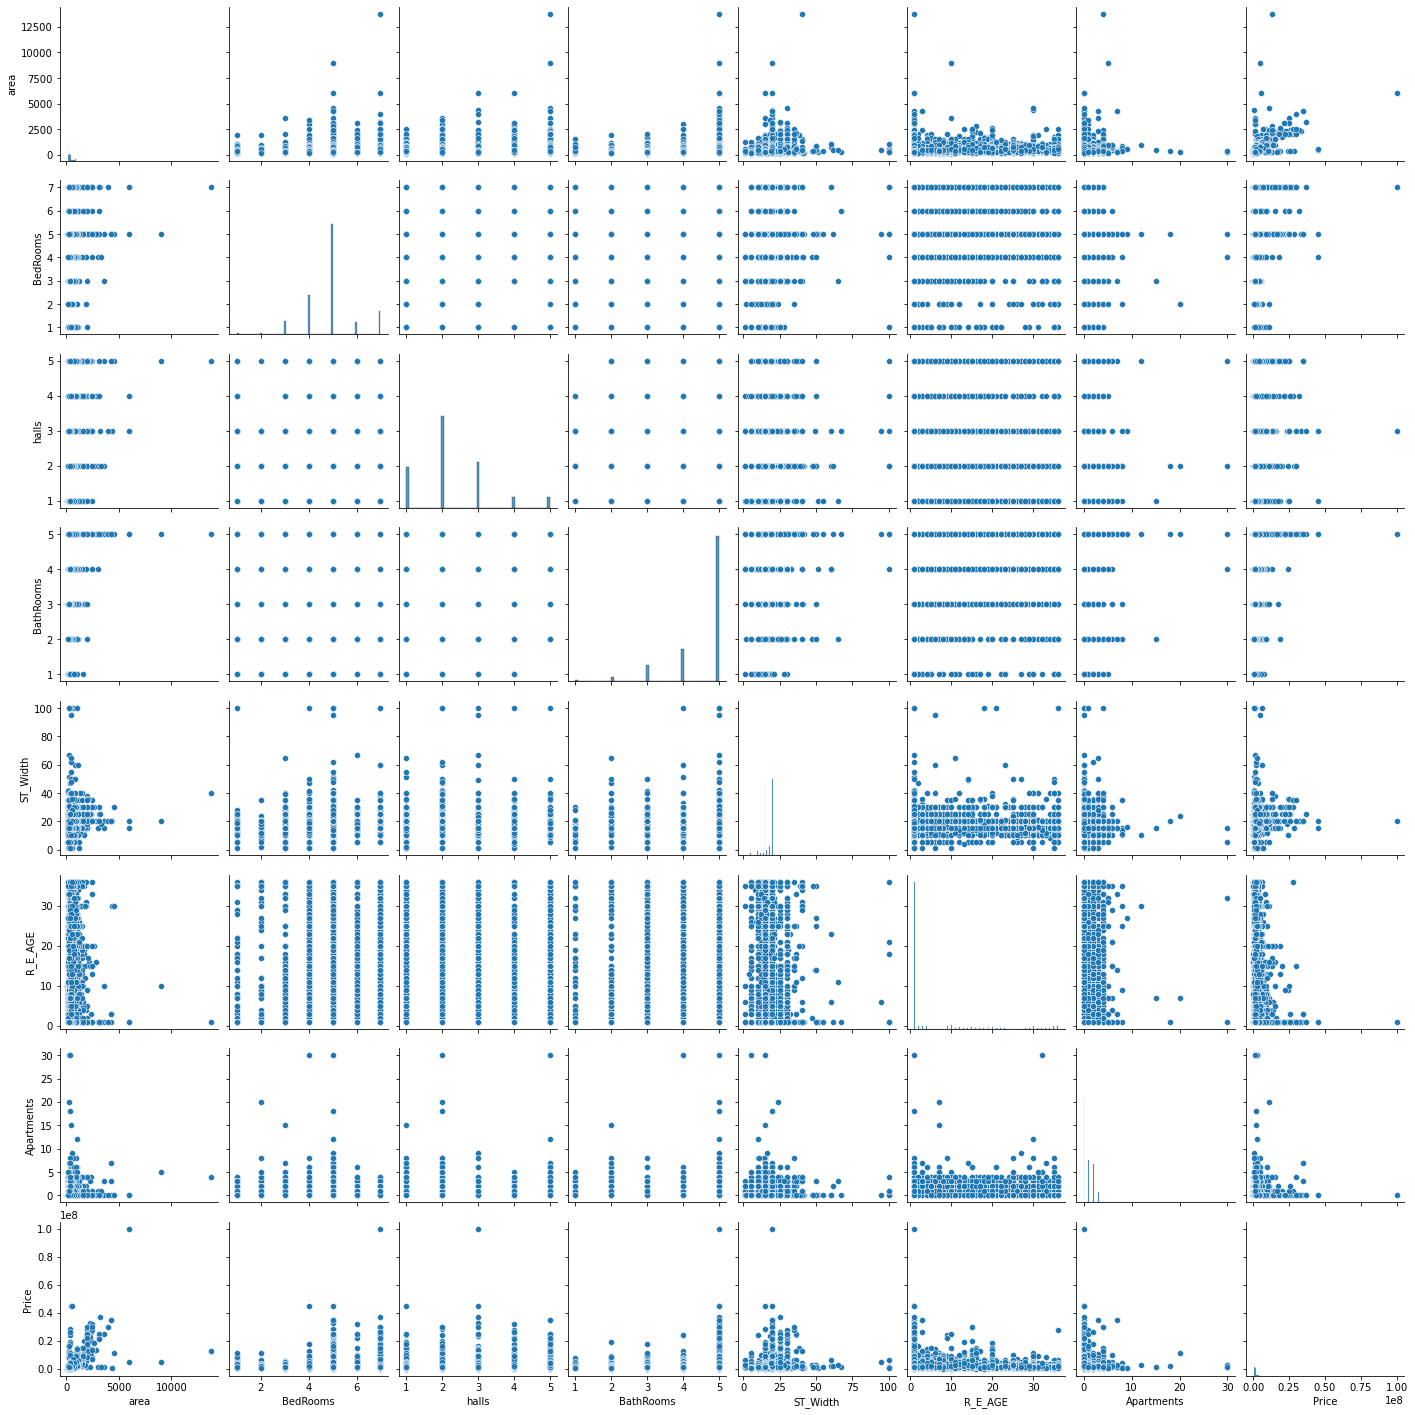

In [116]:
sns.pairplot(dt, plot_kws=dict());

### from above graphs we can see that there is strong positive correlation between area and price and also there is outliers. we need to remove thim.

In [117]:
#remove outliers
dt = dt.loc[dt['area'] <= 1200,:]
dt = dt.loc[dt['Price'] >= 500000,:]
dt = dt.loc[dt['Price'] <= 5000000,:]
dt = dt.loc[dt['ST_Width'] <= 35,:]
dt = dt.loc[dt['Apartments'] <= 4,:]

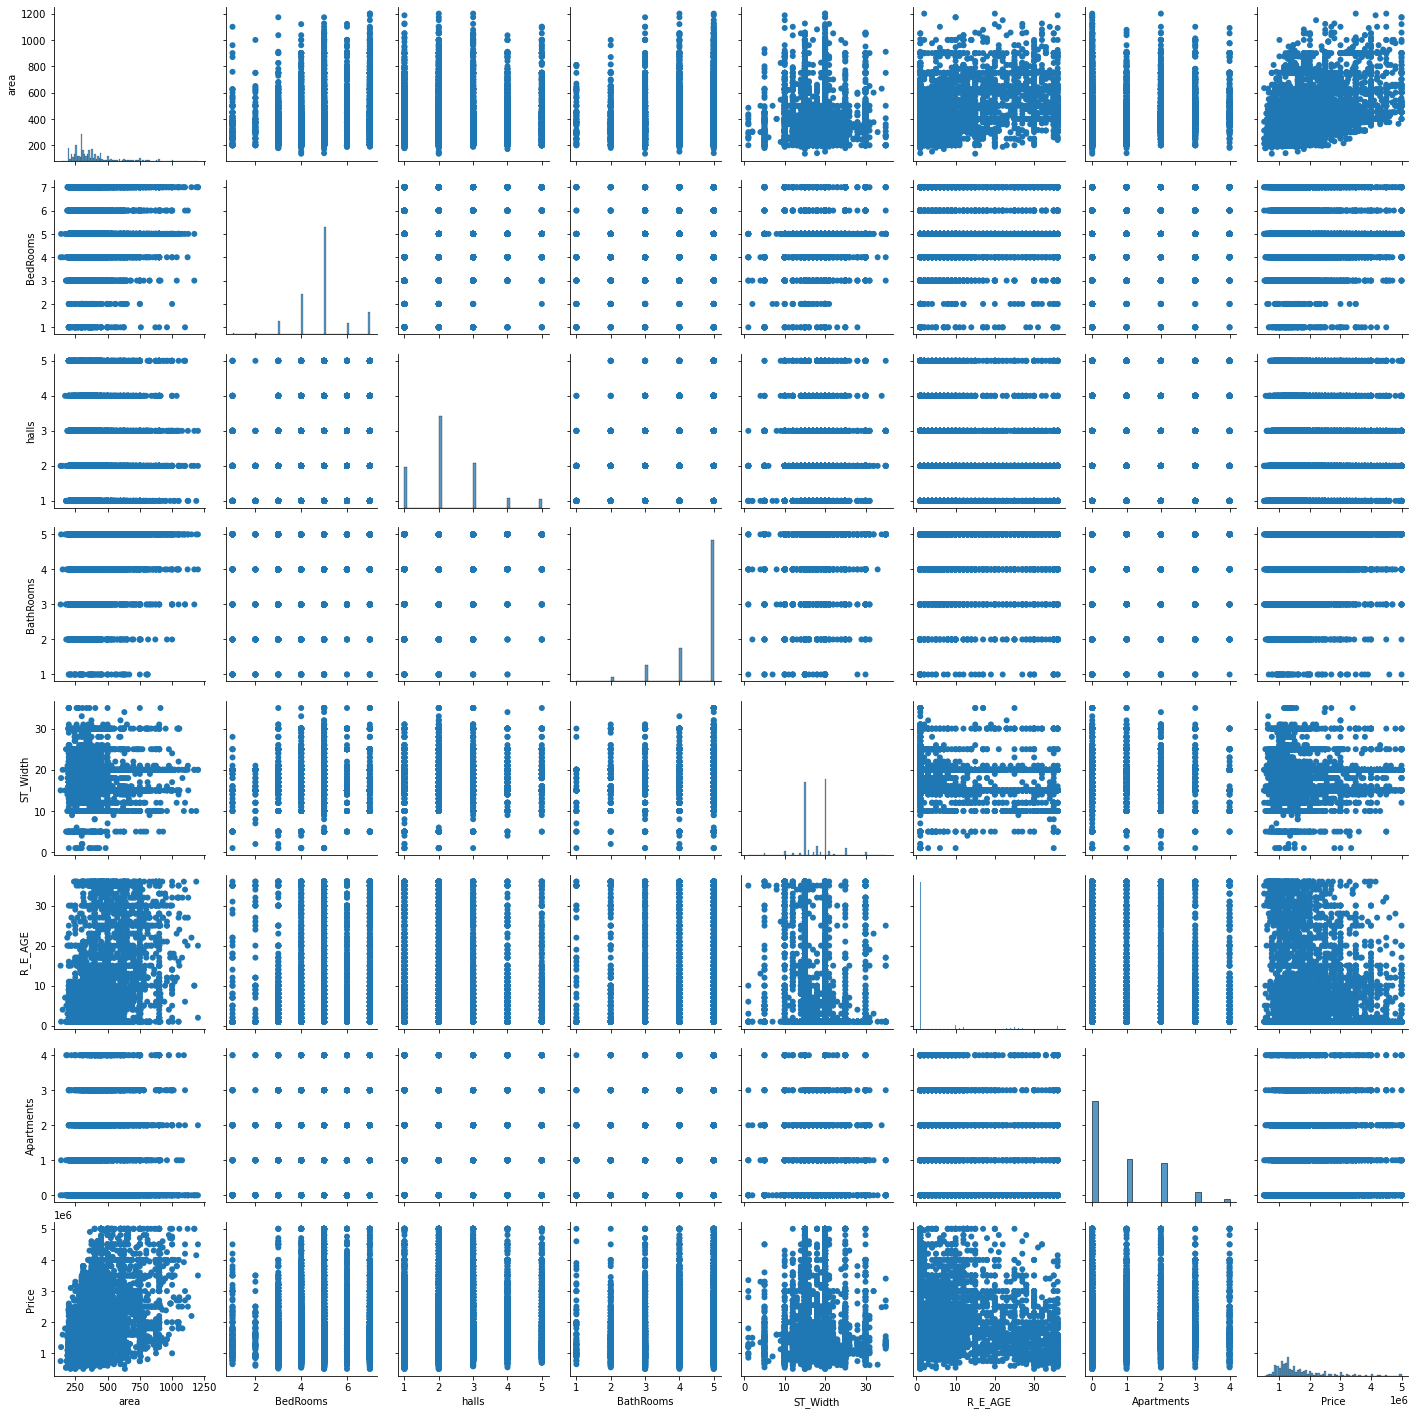

In [118]:
sns.pairplot(dt, plot_kws=dict( edgecolor='none'));

### after removing outliers we found that we have categorical columns such as bathrooms , bedrooms and apartment

Text(0.5, 1.0, 'area vs price')

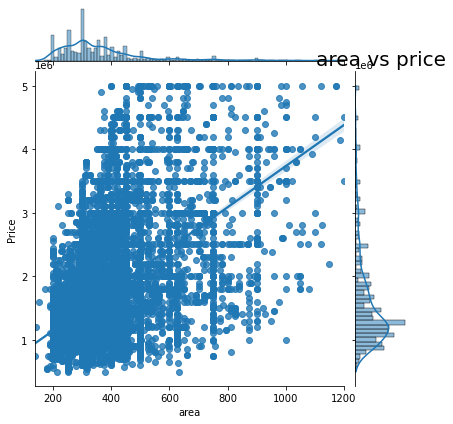

In [168]:
#here plotting the changing an area given prices.
sns.jointplot(x='area', y='Price', data = dt, kind = 'reg')
plt.title( 'area vs price',fontsize =20);



In [120]:
#find top region
top_region = dt.groupby("Region").mean()\
    .sort_values('Price', ascending=False).reset_index()
top_region    

,Region,area,BedRooms,halls,BathRooms,ST_Width,R_E_AGE,Apartments,Price
0,north,409.461779,4.734466,2.385338,4.578006,16.467143,5.215914,0.580241,2.908548e+06
1,east,379.637732,4.865443,2.244413,4.447189,17.633498,5.702893,1.423430,1.750113e+06
2,center,479.367347,5.142857,2.367347,4.326531,16.469388,18.897959,1.081633,1.529617e+06
3,west,328.187837,4.981822,2.280521,4.691203,18.134874,3.736311,0.580341,1.282469e+06
4,south,328.131352,4.903101,2.146425,4.587425,18.818260,2.655039,0.512920,1.026295e+06


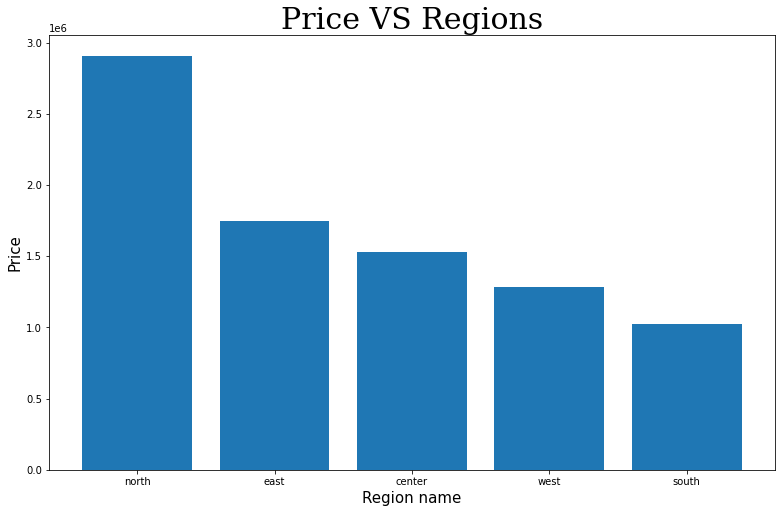

In [121]:
#here the graph is to show the top ragion based on AVG of the price
plt.figure(figsize=(13,8))
plt.bar(top_region['Region'], top_region['Price'])
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Region name', fontsize = 15)
plt.title('Price VS Regions', fontsize = 30,family = 'serif');

In [122]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 14154
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              13364 non-null  int64 
 1   House_Front_Side  13364 non-null  object
 2   BedRooms          13364 non-null  int64 
 3   halls             13364 non-null  int64 
 4   BathRooms         13364 non-null  int64 
 5   ST_Width          13364 non-null  int64 
 6   R_E_AGE           13364 non-null  int64 
 7   Apartments        13364 non-null  int64 
 8   Region            13364 non-null  object
 9   Price             13364 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.1+ MB


In [124]:
#change categorical data to dummy 
dt2 = pd.get_dummies(dt, columns =['Region', 'House_Front_Side','BedRooms','halls','BathRooms','Apartments'], drop_first=True)

In [125]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 14154
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   area                         13364 non-null  int64
 1   ST_Width                     13364 non-null  int64
 2   R_E_AGE                      13364 non-null  int64
 3   Price                        13364 non-null  int64
 4   Region_east                  13364 non-null  uint8
 5   Region_north                 13364 non-null  uint8
 6   Region_south                 13364 non-null  uint8
 7   Region_west                  13364 non-null  uint8
 8   House_Front_Side_north       13364 non-null  uint8
 9   House_Front_Side_north east  13364 non-null  uint8
 10  House_Front_Side_north west  13364 non-null  uint8
 11  House_Front_Side_south       13364 non-null  uint8
 12  House_Front_Side_south east  13364 non-null  uint8
 13  House_Front_Side_south west  13364 non-null  u

In [126]:
dt2.head(15)

,area,ST_Width,R_E_AGE,Price,Region_east,Region_north,Region_south,Region_west,House_Front_Side_north,House_Front_Side_north east,...,halls_4,halls_5,BathRooms_2,BathRooms_3,BathRooms_4,BathRooms_5,Apartments_1,Apartments_2,Apartments_3,Apartments_4
0,375,20,6,1000000,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,406,15,1,2400000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,600,15,1,650000,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,270,13,1,1900000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,360,15,2,1050000,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,450,20,1,3400000,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,220,10,1,880000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,420,19,1,3600000,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
10,220,15,1,1270000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11,495,14,11,3600000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
dt2.corr()

,area,ST_Width,R_E_AGE,Price,Region_east,Region_north,Region_south,Region_west,House_Front_Side_north,House_Front_Side_north east,...,halls_4,halls_5,BathRooms_2,BathRooms_3,BathRooms_4,BathRooms_5,Apartments_1,Apartments_2,Apartments_3,Apartments_4
area,1.000000,-0.020740,0.539969,0.535021,0.098583,0.159425,-0.101086,-0.155625,-0.031462,0.051249,...,0.086278,0.092675,0.012839,0.011785,0.014381,-0.028057,-0.121531,0.147230,0.201182,0.161504
ST_Width,-0.020740,1.000000,-0.152364,-0.036539,-0.030650,-0.158781,0.123471,0.062281,-0.015290,0.023220,...,-0.003059,0.023051,-0.030437,-0.036119,-0.033549,0.067106,-0.011101,0.009076,0.006677,-0.014637
R_E_AGE,0.539969,-0.152364,1.000000,0.070963,0.096924,0.037147,-0.104441,-0.068329,-0.039777,0.058540,...,0.008901,0.020344,0.082367,0.032441,0.038835,-0.088072,-0.105113,-0.042090,0.086182,0.126969
Price,0.535021,-0.036539,0.070963,1.000000,0.071474,0.654948,-0.340557,-0.313157,-0.004129,0.043315,...,0.093709,0.086485,-0.022302,-0.043672,-0.004456,0.036690,-0.051051,0.104830,0.088144,0.065322
Region_east,0.098583,-0.030650,0.096924,0.071474,1.000000,-0.306238,-0.313200,-0.483056,-0.008735,-0.002461,...,0.031122,0.017642,0.042505,0.039526,0.110395,-0.132830,0.151614,0.290683,0.125252,0.038016
Region_north,0.159425,-0.158781,0.037147,0.654948,-0.306238,1.000000,-0.205613,-0.317122,0.016651,0.009090,...,0.041395,0.018828,-0.001870,-0.005497,-0.000424,0.003143,-0.080169,-0.079008,-0.033311,0.004032
Region_south,-0.101086,0.123471,-0.104441,-0.340557,-0.313200,-0.205613,1.000000,-0.324332,-0.002111,-0.011839,...,-0.033682,-0.012239,-0.009715,0.031190,-0.039656,0.019298,0.000808,-0.114419,-0.065806,-0.029770
Region_west,-0.155625,0.062281,-0.068329,-0.313157,-0.483056,-0.317122,-0.324332,1.000000,-0.001210,0.001996,...,-0.040723,-0.025048,-0.034620,-0.060130,-0.076656,0.115515,-0.081373,-0.129675,-0.047134,-0.030091
House_Front_Side_north,-0.031462,-0.015290,-0.039777,-0.004129,-0.008735,0.016651,-0.002111,-0.001210,1.000000,-0.128911,...,-0.010578,-0.017566,0.010893,-0.005559,0.004737,-0.000869,-0.033794,0.026785,-0.006814,-0.012684
House_Front_Side_north east,0.051249,0.023220,0.058540,0.043315,-0.002461,0.009090,-0.011839,0.001996,-0.128911,1.000000,...,-0.006507,0.021767,-0.011039,-0.015805,-0.000928,0.015052,0.040039,-0.033808,-0.003317,0.050472


In [128]:
#sorting the correlation between features and predict(Price) 
dt2.corr()['Price'].sort_values(ascending = False)

Price                          1.000000
Region_north                   0.654948
area                           0.535021
Apartments_2                   0.104830
halls_4                        0.093709
Apartments_3                   0.088144
halls_5                        0.086485
Region_east                    0.071474
R_E_AGE                        0.070963
Apartments_4                   0.065322
BedRooms_4                     0.062328
House_Front_Side_north west    0.060814
House_Front_Side_south east    0.047916
House_Front_Side_south west    0.047262
halls_3                        0.044795
BedRooms_7                     0.044410
House_Front_Side_north east    0.043315
BathRooms_5                    0.036690
House_Front_Side_south         0.026760
BedRooms_6                     0.024252
BedRooms_2                    -0.002177
House_Front_Side_north        -0.004129
BathRooms_4                   -0.004456
BathRooms_2                   -0.022302
ST_Width                      -0.036539


# simple stats model

In [129]:
X = dt2.loc[:,['area', 'ST_Width', 'R_E_AGE','Region_east', 'Region_north',
       'Region_south', 'Region_west', 'House_Front_Side_north',
       'House_Front_Side_north east', 'House_Front_Side_north west',
       'House_Front_Side_south', 'House_Front_Side_south east',
       'House_Front_Side_south west', 'House_Front_Side_west', 'BedRooms_2',
       'BedRooms_3', 'BedRooms_4', 'BedRooms_5', 'BedRooms_6', 'BedRooms_7',
       'halls_2', 'halls_3', 'halls_4', 'halls_5', 'BathRooms_2',
       'BathRooms_3', 'BathRooms_4', 'BathRooms_5', 'Apartments_1',
       'Apartments_2', 'Apartments_3', 'Apartments_4']]

y = dt2['Price']

In [130]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              7477.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:47:03   Log-Likelihood:                     -1.9229e+05
No. Observations:               13364   AIC:                                  3.846e+05
Df Residuals:                   13332   BIC:                                  3.849e+05
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
area                         3362.8076     34.226     98.252      0.000    3295.719    3429.896
ST_Width                      1.09e+04   1009.698     10.795      0.000    8920.480    1.29e+04
R_E_AGE                     -2.905e+04    573.788    -50.630      0.000   -3.02e+04   -2.79e+04
Region_east                  2.503e+05    3.8e+04      6.589      0.000    1.76e+05    3.25e+05
Region_north                 1.282e+06   3.84e+04     33.394      0.000    1.21e+06    1.36e+06
Region_south                -4.129e+05   3.86e+04    -10.698      0.000   -4.89e+05   -3.37e+05
Region_west                 -1.317e+05   3.79e+04     -3.474      0.001   -2.06e+05   -5.74e+04
House_Front_Side_north       4.034e+04    1.1e+04      3.677      0.000    1.88e+04    6.18e+04
House_Front_Side_north east  1.313e+05   1.95e+04      6.747      0.000    9.32e+04    1.69e+05
House_Front_Side_north west  1.294e+05   2.25e+04      5.742      0.000    8.52e+04    1.74e+05
House_Front_Side_south       5.205e+04   1.14e+04      4.567      0.000    2.97e+04    7.44e+04
House_Front_Side_south east  1.767e+05   2.23e+04      7.928      0.000    1.33e+05     2.2e+05
House_Front_Side_south west  1.726e+05   2.35e+04      7.360      0.000    1.27e+05    2.19e+05
House_Front_Side_west        2.005e+04   1.21e+04      1.655      0.098   -3698.806    4.38e+04
BedRooms_2                  -2.411e+04   6.23e+04     -0.387      0.699   -1.46e+05     9.8e+04
BedRooms_3                  -4.725e+04   3.89e+04     -1.213      0.225   -1.24e+05    2.91e+04
BedRooms_4                   4.869e+04   3.72e+04      1.308      0.191   -2.43e+04    1.22e+05
BedRooms_5                   5.474e+04   3.68e+04      1.486      0.137   -1.75e+04    1.27e+05
BedRooms_6                   6.851e+04   3.97e+04      1.727      0.084   -9234.474    1.46e+05
BedRooms_7                   4.026e+04   3.82e+04      1.053      0.292   -3.47e+04    1.15e+05
halls_2                      6.392e+04   1.03e+04      6.221      0.000    4.38e+04    8.41e+04
halls_3                      1.122e+05   1.19e+04      9.459      0.000     8.9e+04    1.36e+05
halls_4                      1.144e+05   1.87e+04      6.101      0.000    7.76e+04    1.51e+05
halls_5                       1.43e+05   1.98e+04      7.207      0.000    1.04e+05    1.82e+05
BathRooms_2                  3.853e+04   4.92e+04      0.784      0.433   -5.79e+04    1.35e+05
BathRooms_3                   583.4111   4.46e+04      0.013      0.990   -8.69e+04     8.8e+04
BathRooms_4                  3.227e+04    4.4e+04      0.734      0.463    -5.4e+04    1.19e+05
BathRooms_5                  8.125e+04   4.37e+04      1.861      0.063   -4331.565    1.67e+05
Apartmen

In [131]:
#trying to get the log to improve data and train it again
dt2['log_R_E_AGE']= np.log(dt2.R_E_AGE)
dt2['log_STWidth']= np.log(dt2.ST_Width)
dt2['log_Apartments']= np.log(dt.Apartments)


/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
X2 = dt2.loc[:,['area', 'log_STWidth', 'log_R_E_AGE','Region_east', 'Region_north',
       'Region_south', 'Region_west', 'House_Front_Side_north',
       'House_Front_Side_north east', 'House_Front_Side_north west',
       'House_Front_Side_south', 'House_Front_Side_south east',
       'House_Front_Side_south west', 'House_Front_Side_west',
       'BedRooms_3', 'BedRooms_7',
       'halls_2', 'halls_3', 'halls_4', 'halls_5', 'BathRooms_2',
       'BathRooms_4', 'BathRooms_5', 'Apartments_1', 'Apartments_3', 'Apartments_4']]

y2 = dt2['Price']

In [133]:
model = sm.OLS(y2,X2)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              8456.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        13:47:04   Log-Likelihood:                     -1.9282e+05
No. Observations:               13364   AIC:                                  3.857e+05
Df Residuals:                   13338   BIC:                                  3.859e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
area                         3152.9947     34.905     90.332      0.000    3084.577    3221.413
log_STWidth                  1.367e+05   1.22e+04     11.215      0.000    1.13e+05    1.61e+05
log_R_E_AGE                 -1.718e+05   4427.615    -38.804      0.000    -1.8e+05   -1.63e+05
Region_east                  1.549e+05   3.46e+04      4.475      0.000    8.71e+04    2.23e+05
Region_north                 1.213e+06   3.46e+04     35.046      0.000    1.15e+06    1.28e+06
Region_south                -4.997e+05   3.56e+04    -14.023      0.000    -5.7e+05    -4.3e+05
Region_west                 -2.285e+05   3.47e+04     -6.586      0.000   -2.97e+05   -1.61e+05
House_Front_Side_north       3.448e+04   1.14e+04      3.031      0.002    1.22e+04    5.68e+04
House_Front_Side_north east  1.161e+05   2.02e+04      5.733      0.000    7.64e+04    1.56e+05
House_Front_Side_north west  1.173e+05   2.34e+04      5.003      0.000    7.13e+04    1.63e+05
House_Front_Side_south       4.483e+04   1.18e+04      3.791      0.000    2.17e+04     6.8e+04
House_Front_Side_south east  1.617e+05   2.32e+04      6.977      0.000    1.16e+05    2.07e+05
House_Front_Side_south west  1.748e+05   2.44e+04      7.165      0.000    1.27e+05    2.23e+05
House_Front_Side_west        1.301e+04   1.26e+04      1.034      0.301   -1.16e+04    3.77e+04
BedRooms_3                  -8.846e+04   1.61e+04     -5.496      0.000    -1.2e+05   -5.69e+04
BedRooms_7                  -3.408e+04   1.28e+04     -2.667      0.008   -5.91e+04   -9032.366
halls_2                      4.883e+04   1.07e+04      4.577      0.000    2.79e+04    6.97e+04
halls_3                      1.076e+05   1.23e+04      8.740      0.000    8.35e+04    1.32e+05
halls_4                      1.237e+05   1.95e+04      6.347      0.000    8.55e+04    1.62e+05
halls_5                      1.473e+05   2.06e+04      7.145      0.000    1.07e+05    1.88e+05
BathRooms_2                 -2.188e+04   2.88e+04     -0.760      0.447   -7.83e+04    3.45e+04
BathRooms_4                  2.241e+04   1.61e+04      1.394      0.163   -9102.947    5.39e+04
BathRooms_5                  7.719e+04   1.45e+04      5.338      0.000    4.88e+04    1.06e+05
Apartments_1                 1391.6983   9724.330      0.143      0.886   -1.77e+04    2.05e+04
Apartments_3                 6.797e+04   1.82e+04      3.734      0.000    3.23e+04    1.04e+05
Apartments_4                 -2.13e+04   3.22e+04     -0.661      0.509   -8.45e+04    4.19e+04
==============================================================================
Omnibus:                     2398.655   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Ja

## split data to 90 ,5,5 and compare regression

In [134]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.05, random_state=10)

In [135]:
X_train, X_val , y_train , y_val = train_test_split(X,y, test_size=.047,random_state = 3)

## Linear Regression 

In [136]:
#set up the linear model:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [137]:
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.745
Linear Regression val R^2: 0.761


### after we get the value of linear regression we want to do some feature engneering to improve validation score

In [138]:
#new function that split data and give val score and coefficient for each feature
def split_and_validate(X,y):
    
    X_train, X_val, y_train, y_val= \
        train_test_split(X, y , test_size = 0.047 , random_state = 3)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train , y_train)
    val_score = lr_model.score(X_val, y_val)
    
    print('\n Validation R^2 score was:', val_score)
    print('feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 


In [139]:
split_and_validate(X,y)


 Validation R^2 score was: 0.7609699690396636
feature coefficient results: 

area : 3341.48
ST_Width : 9974.77
R_E_AGE : -29169.65
Region_east : 169807.37
Region_north : 1191008.11
Region_south : -503488.63
Region_west : -221761.06
House_Front_Side_north : 30032.02
House_Front_Side_north east : 129351.41
House_Front_Side_north west : 126320.65
House_Front_Side_south : 49938.06
House_Front_Side_south east : 180453.73
House_Front_Side_south west : 166968.28
House_Front_Side_west : 17104.28
BedRooms_2 : -76509.42
BedRooms_3 : -89821.78
BedRooms_4 : 1188.45
BedRooms_5 : 16498.25
BedRooms_6 : 26577.07
BedRooms_7 : -1968.19
halls_2 : 63258.10
halls_3 : 107763.15
halls_4 : 119988.18
halls_5 : 137961.88
BathRooms_2 : -66651.30
BathRooms_3 : -109397.03
BathRooms_4 : -71250.11
BathRooms_5 : -21786.09
Apartments_1 : -13900.82
Apartments_2 : -35176.97
Apartments_3 : -54166.26
Apartments_4 : -95241.52


In [140]:
#tri to enhance the linear regression
X2 = X.copy()

X2['ar_x_age'] = X2['R_E_AGE'] * X2['Region_south']

X2['nt_/_ar'] = X2['Region_north'] / X2['area']
X2['st_/_ar'] = X2['Region_south'] / X2['area']
X2['est_/_ar'] = X2['Region_east'] / X2['area']
X2['STW/_ar'] = X2['ST_Width'] * X2['area']

split_and_validate(X2, y)


 Validation R^2 score was: 0.778160269975808
feature coefficient results: 

area : 2091.44
ST_Width : -7436.65
R_E_AGE : -29830.35
Region_east : 515315.10
Region_north : 1937477.70
Region_south : -1033714.65
Region_west : -306181.57
House_Front_Side_north : 21884.70
House_Front_Side_north east : 124165.01
House_Front_Side_north west : 120257.32
House_Front_Side_south : 43262.23
House_Front_Side_south east : 177678.51
House_Front_Side_south west : 151449.61
House_Front_Side_west : 14657.55
BedRooms_2 : -84097.47
BedRooms_3 : -72685.35
BedRooms_4 : 24381.91
BedRooms_5 : 9053.79
BedRooms_6 : 26324.35
BedRooms_7 : 7371.89
halls_2 : 52718.97
halls_3 : 99406.60
halls_4 : 113327.59
halls_5 : 131155.14
BathRooms_2 : -59503.24
BathRooms_3 : -89937.79
BathRooms_4 : -50004.42
BathRooms_5 : -2002.16
Apartments_1 : 5676.13
Apartments_2 : -46190.03
Apartments_3 : -68438.53
Apartments_4 : -105637.59
ar_x_age : 9981.44
nt_/_ar : -295058867.98
st_/_ar : 126961519.85
est_/_ar : -139201741.25
STW/_ar : 

## Polynomial Regression with 2nd degree

In [141]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8002444651599967

In [142]:
lr_poly.score(X_val_poly, y_val)

-182785.08141593853

In [143]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [144]:
lin_reg_est = LinearRegression()
lin_reg_est.fit(X_train, y_train)


LinearRegression()

## Evaluating Model


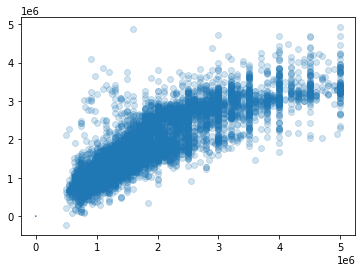

In [145]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

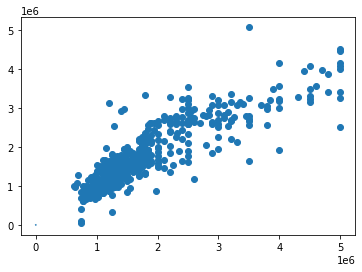

In [146]:
# Fitted vs. Actual
y_vall_pred = lin_reg_est.predict(X_val)
plt.scatter(y_val, y_vall_pred)
plt.plot([0, 400], [0, 400])

Text(0.5, 1.0, 'Res vs pred')

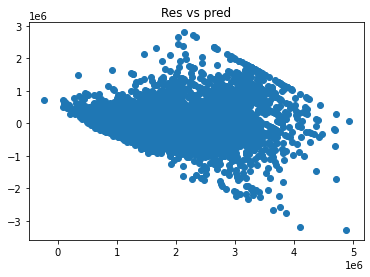

In [147]:
# Plot Residuals vs. predicted
lin_reg_residuals = y_train - y_train_pred
plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,400],[0,0])
plt.title('Res vs pred')

# Lasso

In [148]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Lasso Model:


/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2019808194397.75, tolerance: 704292703216.0171
  model = cd_fast.enet_coordinate_descent(
/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 897083627107.5, tolerance: 710727491411.6218
  model = cd_fast.enet_coordinate_descent(
/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148385236033.25, tolerance: 696029474650.1274
  model = cd_fast.enet_coordinate_descent(
/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_

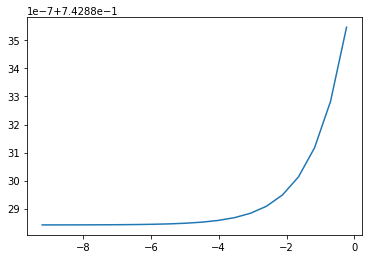

In [149]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [150]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [151]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_lasso = Lasso(alpha=0.7943282347242815)

In [152]:
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')


Lasso Regression train R^2: 0.745
Lasso Regression val R^2: 0.761


# RIDGE

Ridge Model:


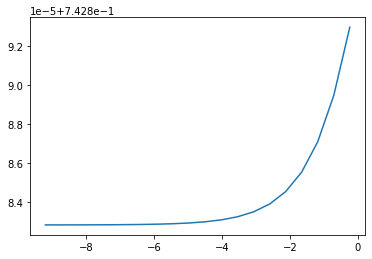

In [153]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [154]:
grid_est.best_estimator_

Ridge(alpha=0.7943282347242815)

In [155]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


lm_rig = Ridge(alpha=0.7943282347242815)

In [156]:
lm_rig.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_rig.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_rig.score(X_val_scaled, y_val):.3f}')

Ridge Regression train R^2: 0.745
Ridge Regression val R^2: 0.761


# find Elastic prediction with grid search and finding 

In [170]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Elastic Net Grid Search


/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3183890070426.25, tolerance: 704292703216.0171
  model = cd_fast.enet_coordinate_descent(
/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1463649169636.25, tolerance: 710727491411.6218
  model = cd_fast.enet_coordinate_descent(
/Users/abuda7m/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1736510287323.75, tolerance: 696029474650.1274
  model = cd_fast.enet_coordinate_descent(


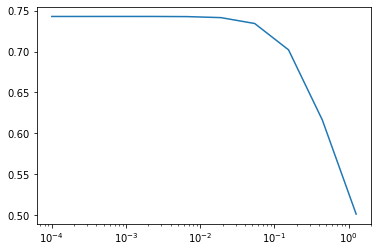

In [172]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10));

In [173]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred = elastic_net_grid_est.predict(X_val)
print("ElasticNet Regression:", r2_score(y_val, y_pred))

ElasticNet Regression: 0.7610190581588978


In [162]:
#best alpha
elastic_net_grid_est.best_estimator_

ElasticNet(alpha=0.000814912746902074)

# Polynomial Regression with LassoCV

In [163]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8002444651599967

In [164]:
lr_poly.score(X_val_poly, y_val)

-182785.08141593853

In [165]:

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)


X_val_poly_scaled = scaler.transform(X_val_poly)


lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.7927889448600368

In [166]:
lasso.score(X_val_poly_scaled, y_val)

0.7855729265594272

### Find test scoere for LassoCV with poly feature

In [167]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

0.8150326444221476